**CNNによる2次元顔画像表情判定**

In [ ]:
!ps aux
!kill -9 <pid>

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0    992     4 ?        Ss   11:56   0:01 /sbin/docker-
root           7  0.0  0.4 345956 56600 ?        Sl   11:56   0:04 /tools/node/b
root          18  0.0  0.0  35892  4764 ?        Ss   11:56   0:01 tail -n +0 -F
root          36  0.0  0.3 160356 41756 ?        S    11:56   0:00 python3 /usr/
root          49  0.0  0.4 194928 61316 ?        Rl   11:56   0:06 /usr/bin/pyth
root          50  0.1  0.0 708340  7400 ?        Sl   11:56   0:13 /usr/local/bi
root          61  1.2  4.3 2893408 572276 ?      Ssl  12:04   2:33 /usr/bin/pyth
root          81  0.1  0.1 129180 17096 ?        Sl   12:04   0:22 /usr/bin/pyth
root         123  0.0  0.0  18380   296 ?        S    12:06   0:00 /bin/bash --n
root         124  0.0  0.1 2167348 18276 ?       Sl   12:06   0:00 /opt/google/d
root         125  0.0  0.0  11728  2336 ?        S    12:06   0:00 grep --color=
root         205  0.7  0.8 2548208

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

**訓練画像、検証画像、テスト画像のディレクトリ**

In [ ]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/kaggle/Facial Experience'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

img_rows, img_cols = 48, 48

os.path.join(base_dir,'path')

**ImageDataGeneratorを使って画像データを拡張する**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=2048,
                                                    shuffle=True)

Found 93005 images belonging to 7 classes.


train 93005枚
5x11x19x89

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = valid_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(img_rows, img_cols),
                                                        color_mode='rgb',
                                                        classes=classes,
                                                        class_mode='categorical',
                                                        batch_size=256,
                                                        shuffle=True)

Found 17376 images belonging to 7 classes.


valid 17376枚

**CNNモデル**

出力層
二値分類→sigmoid
他クラス分類→softmax
回帰分類→恒等関数

In [ ]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**コールバックを使った学習**

In [ ]:
hdf5_file = os.path.join(base_dir, 'model.hdf5')

In [ ]:
model.load_weights(hdf5_file)

ValueError: ignored

再度ここから

In [ ]:
from keras.callbacks import ModelCheckpoint
modelCheckpoint = ModelCheckpoint(filepath = hdf5_file,
                                  monitor='loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=45,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=67,
                    callbacks=[modelCheckpoint],
                    verbose=1)

Epoch 1/5
45/45 [==============================] - 490s 11s/step - loss: 0.8772 - acc: 0.6868 - val_loss: 1.3299 - val_acc: 0.5326

Epoch 00001: loss improved from 0.87861 to 0.87718, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 2/5
45/45 [==============================] - 464s 10s/step - loss: 0.8793 - acc: 0.6861 - val_loss: 1.3391 - val_acc: 0.5317

Epoch 00002: loss did not improve from 0.87718
Epoch 3/5
45/45 [==============================] - 458s 10s/step - loss: 0.8688 - acc: 0.6909 - val_loss: 1.3220 - val_acc: 0.5402

Epoch 00003: loss improved from 0.87718 to 0.86884, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 4/5
45/45 [==============================] - 460s 10s/step - loss: 0.8672 - acc: 0.6915 - val_loss: 1.3055 - val_acc: 0.5448

Epoch 00004: loss improved from 0.86884 to 0.86716, saving model to /content/drive/MyDrive/kaggle/Facial Experience/model.hdf5
Epoch 5/5
45/45 [===========================

In [ ]:
model.save(hdf5_file)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

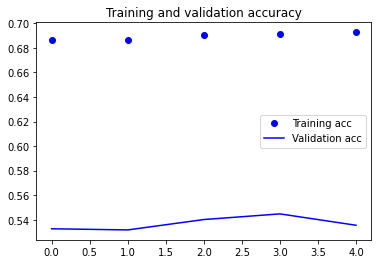

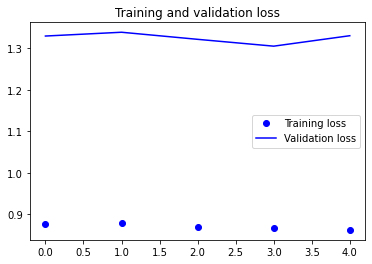

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**テスト**

In [ ]:
hdf5_file = os.path.join(base_dir, 'model.hdf5')

In [ ]:
model=keras.models.load_model(hdf5_file)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
import numpy as np
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(img_rows, img_cols),
                                                  color_mode='rgb',
                                                  classes=classes,
                                                  class_mode='categorical',
                                                  batch_size=32,
                                                  shuffle=False)

test_steps_per_Epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

Found 17496 images belonging to 7 classes.


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
predictions = model.predict_generator(test_generator, steps=test_steps_per_Epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
# Ground-Truthクラスとクラスラベルを取得する
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


**ROC曲線**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(predictions,columns =classes)
df.insert(0, 'true_classes', true_classes)
df

,true_classes,angry,disgust,fear,happy,neutral,sad,surprise
0,0,0.463609,0.126887,0.037178,0.003320,0.110525,0.233876,0.024605
1,0,0.433140,0.132621,0.032927,0.027482,0.230163,0.093374,0.050293
2,0,0.825364,0.042959,0.003239,0.000192,0.101429,0.026430,0.000389
3,0,0.459781,0.147730,0.015097,0.013627,0.275506,0.072112,0.016147
4,0,0.855410,0.053865,0.048202,0.004669,0.009423,0.003138,0.025293
...,...,...,...,...,...,...,...,...
17491,6,0.000803,0.000312,0.056531,0.006388,0.001971,0.000735,0.933261
17492,6,0.002096,0.000166,0.233407,0.001211,0.000187,0.000477,0.762455
17493,6,0.071024,0.016801,0.074791,0.008639,0.464110,0.357621,0.007014
17494,6,0.126203,0.007130,0.425216,0.154314,0.108643,0.145225,0.033269


In [ ]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(df.iloc[:, 0], classes=[0,1,2,3,4,5,6])

In [ ]:
M1_y_score = []
for i in df.index:
    M1_y_score.append(([df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3], df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6], df.iloc[i, 7]]))
M1_y_score = M1_y_score

In [ ]:
#多クラスの AUC 
from sklearn.metrics import roc_auc_score
auc_m1 = roc_auc_score(y_test, M1_y_score, multi_class="ovo")
print(auc_m1)

0.8413539008041602


In [ ]:
M1_fpr = dict()
M1_tpr = dict()
M1_roc_auc = dict()

In [ ]:
M1_y_score = np.array(M1_y_score)
n_classes = 7
from sklearn.metrics import roc_curve, auc
for i in range(n_classes):
    M1_fpr[i], M1_tpr[i], _ = roc_curve(y_test[:, i], M1_y_score[:, i])
    M1_roc_auc[i] = auc(M1_fpr[i], M1_tpr[i])

In [ ]:
M1_all_fpr = np.unique(np.concatenate([M1_fpr[i] for i in range(n_classes)]))

M1_mean_tpr = np.zeros_like(M1_all_fpr)


for i in range(n_classes):
    M1_mean_tpr += np.interp(M1_all_fpr, M1_fpr[i], M1_tpr[i])


M1_mean_tpr /= n_classes

M1_fpr["macro"] = M1_all_fpr
M1_tpr["macro"] = M1_mean_tpr
M1_roc_auc["macro"] = auc(M1_fpr["macro"], M1_tpr["macro"])

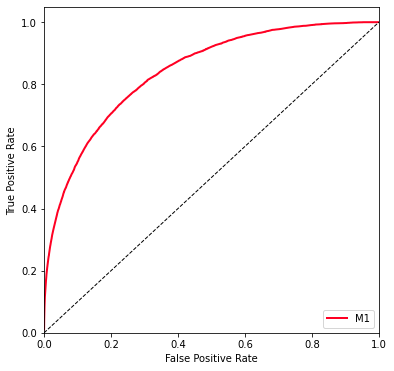

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

lw=1
colors = [cm.gist_ncar(190), cm.gist_ncar(30), cm.gist_ncar(10)]
sns.color_palette(colors)
sns.set_palette(colors, desat=1.0)

plt.figure(figsize=(6, 6))

plt.plot(M1_fpr["macro"], M1_tpr["macro"],
         label='M1',
         color=colors[0], 
         linestyle='-', 
         linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**------------------ここまでROC--------------------**

In [ ]:
from sklearn import metrics
# scikit-learnを使用して統計を取得する
report = metrics.classification_report(true_classes, 
                                       predicted_classes, 
                                       labels=np.arange(len(classes)),
                                       target_names=classes)
print(report)

              precision    recall  f1-score   support

       angry       0.49      0.59      0.54      1041
     disgust       0.52      0.03      0.05       655
        fear       0.44      0.23      0.30       691
       happy       0.85      0.49      0.62      5469
     neutral       0.53      0.85      0.66      5988
         sad       0.42      0.31      0.36      2177
    surprise       0.55      0.56      0.56      1475

    accuracy                           0.58     17496
   macro avg       0.54      0.44      0.44     17496
weighted avg       0.61      0.58      0.56     17496



正解率（accuracy）: accuracy_score()

適合率（precision）: precision_score()

再現率（recall）: recall_score()

F1値（F1-measure）: f1_score()

**混同行列**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix


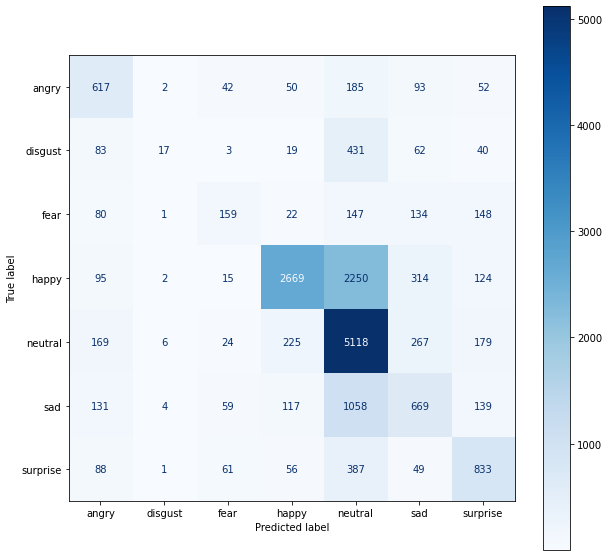

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Y_pred = model.predict_generator(test_generator, test_steps_per_Epoch)
y_pred = np.argmax(Y_pred, axis=1)
print("Confusion Matrix")
# confusion matrixの作成
cm = confusion_matrix(test_generator.classes, y_pred)
#表示
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax, cmap="Blues")

**参考**


*   [Keras / CNN] 多クラス画像分類 --- ラーメンの味分類

    https://qiita.com/Phoeboooo/items/cfe8560fe8a285855340
*   roc曲線

    https://qiita.com/hirota_ortho/items/5e1e1976dbdfc8acd7f0
